In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram
pi = np.pi


# Example

Find one marked 4-qubit state |0101> 

In [40]:
def grover_circuit(n):
    
    qc = QuantumCircuit(n)

    for qubit in range(n):
        qc.h(qubit)
    
    qc.x(0)
    qc.x(2)
    
    qc.barrier()
    
    qc.cu1(pi/4, 0,3) 
    qc.cx(0,1) 
    qc.cu1(-pi/4, 1,3) 
    qc.cx(0, 1) 
    qc.cu1(pi/4, 1,3) 
    qc.cx(1, 2) 
    qc.cu1(-pi/4, 2,3) 
    qc.cx(0, 2) 
    qc.cu1(pi/4, 2,3) 
    qc.cx(1, 2)
    qc.cu1(-pi/4, 2,3) 
    qc.cx(0, 2) 
    qc.cu1(pi/4, 2,3)
    
    qc.barrier()
    qc.x(0)
    qc.x(2)

    qc.barrier()

    for qubit in range(n):
        qc.h(qubit)
    for qubit in range(n):
        qc.x(qubit)


    qc.barrier()
    
    qc.cu1(pi/4, 0,3) 
    qc.cx(0,1) 
    qc.cu1(-pi/4, 1,3) 
    qc.cx(0, 1) 
    qc.cu1(pi/4, 1,3) 
    qc.cx(1, 2) 
    qc.cu1(-pi/4, 2,3) 
    qc.cx(0, 2) 
    qc.cu1(pi/4, 2,3) 
    qc.cx(1, 2)
    qc.cu1(-pi/4, 2,3) 
    qc.cx(0, 2) 
    qc.cu1(pi/4, 2,3)


    for qubit in range(n):
        qc.x(qubit)
    for qubit in range(n):
        qc.h(qubit)


    
    return qc 

             ┌───┐┌───┐ ░                                                   »
     q_0: |0>┤ H ├┤ X ├─░──■───────■────────────■────────────────────────■──»
             ├───┤└───┘ ░  │     ┌─┴─┐        ┌─┴─┐                      │  »
     q_1: |0>┤ H ├──────░──┼─────┤ X ├─■──────┤ X ├─■───────■────────────┼──»
             ├───┤┌───┐ ░  │     └───┘ │      └───┘ │     ┌─┴─┐        ┌─┴─┐»
     q_2: |0>┤ H ├┤ X ├─░──┼───────────┼────────────┼─────┤ X ├─■──────┤ X ├»
             ├───┤└───┘ ░  │pi/4       │-pi/4       │pi/4 └───┘ │-pi/4 └───┘»
     q_3: |0>┤ H ├──────░──■───────────■────────────■───────────■───────────»
             └───┘      ░                                                   »
measure_0: 0 ═══════════════════════════════════════════════════════════════»
                                                                            »
measure_1: 0 ═══════════════════════════════════════════════════════════════»
                                                                

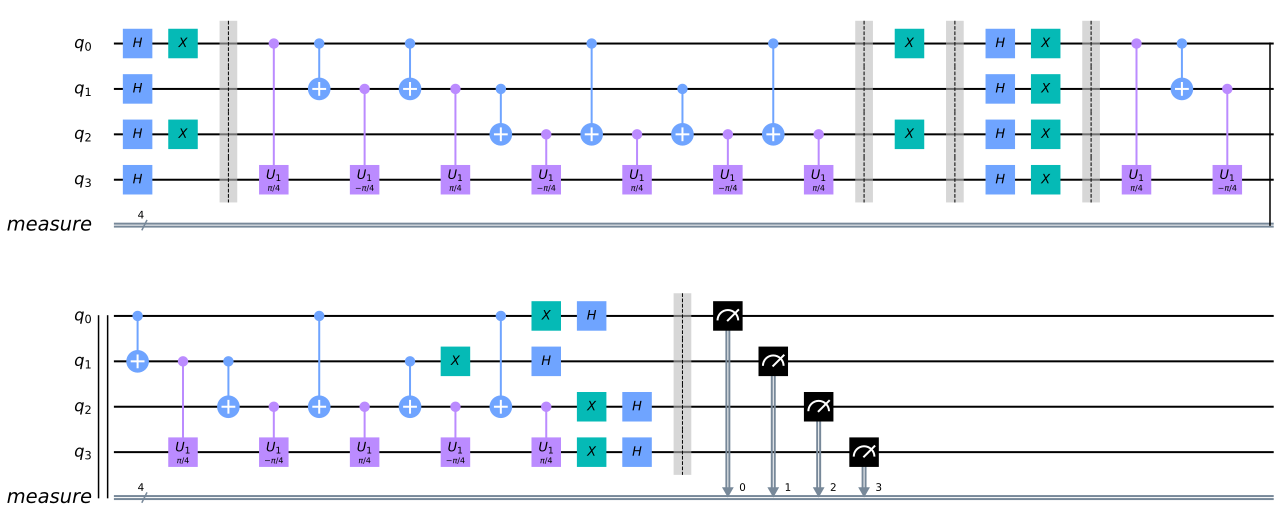

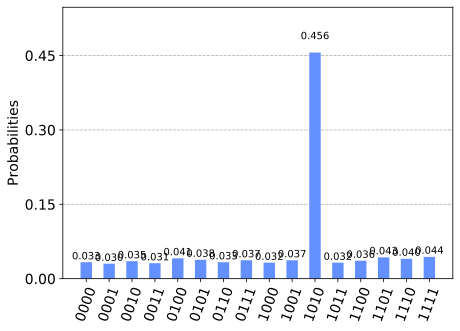

In [42]:
n = 4

qc = grover_circuit(n)
qc.measure_all()

print(qc)
display(qc.draw('mpl'))


backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

display(plot_histogram(answer))
